## Non Linear Autoencoders

In [19]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

In [20]:
from tensorflow.examples.tutorials.mnist import input_data

In [21]:
mnist = input_data.read_data_sets('../MNIST_data/',one_hot=True)

Extracting ../MNIST_data/train-images-idx3-ubyte.gz
Extracting ../MNIST_data/train-labels-idx1-ubyte.gz
Extracting ../MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../MNIST_data/t10k-labels-idx1-ubyte.gz


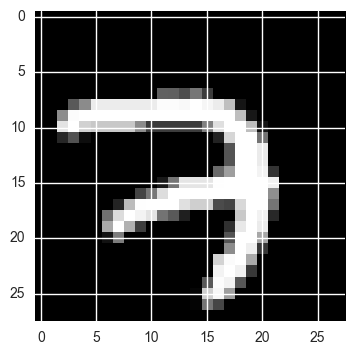

In [22]:
plt.imshow(mnist.train.images[0].reshape((28,28)),cmap='gray',interpolation="nearest")

In [47]:
learning_rate = 0.01
n_training_examples,n_features = mnist.train.images.shape
batch_size = 100
n_epochs = 100

In [48]:
tf.reset_default_graph()

In [49]:
with tf.variable_scope("data") as scope:
    input_image = tf.placeholder(dtype=tf.float32,shape=[None,784],name="input")

In [50]:
with tf.variable_scope("hidden_layer") as scope:
    w = tf.get_variable(name="weights",shape=[784,128],initializer=tf.contrib.layers.xavier_initializer())
    b = tf.get_variable(name="biases",shape=[128],initializer=tf.random_normal_initializer())
    encoding = tf.nn.relu(tf.matmul(input_image,w) + b)

In [51]:
with tf.variable_scope("output_layer") as scope:
    w = tf.get_variable(name="weights",shape=[128,784],initializer=tf.contrib.layers.xavier_initializer())
    b = tf.get_variable(name="biases",shape=[784],initializer=tf.random_normal_initializer())
    output_image = tf.matmul(encoding,w) + b

In [52]:
with tf.variable_scope("loss") as scope:
    loss = tf.reduce_mean(tf.squared_difference(input_image,output_image))

In [53]:
with tf.variable_scope("optimizer") as scope:
    optimizer = tf.train.AdagradOptimizer(learning_rate).minimize(loss)

In [54]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    writer = tf.summary.FileWriter('graphs/',sess.graph)
    ## Training the network
    for i in range(n_epochs):
        epoch_loss = 0
        for batch in range(n_training_examples/batch_size):
            x_batch,_ = mnist.train.next_batch(batch_size)
            _,l = sess.run([optimizer,loss],feed_dict = {input_image:x_batch})
            epoch_loss += l
        print 'Epoch: {}\t Loss: {}'.format(i+1,epoch_loss)
    
    ## Testing Examples
    print 'Checking the output of network on Test data....'
    output = []
    error = 0
    for i in range(n_testing_examples/batch_size):
        x_batch,_ = mnist.test.next_batch(batch_size)
        l,image = sess.run([loss,output_image],feed_dict = {input_image:x_batch})
        output.append(image)
        error += l
        if (i+1)%10 == 0:
            print 'Error after {} batches: {}'.format(i+1,error)
            error = 0

Epoch: 1	 Loss: 114.051694684
Epoch: 2	 Loss: 44.3769447654
Epoch: 3	 Loss: 42.0630340427
Epoch: 4	 Loss: 40.484398596
Epoch: 5	 Loss: 39.3076668307
Epoch: 6	 Loss: 38.372906208
Epoch: 7	 Loss: 37.5898293555
Epoch: 8	 Loss: 36.9051306956
Epoch: 9	 Loss: 36.2813824564
Epoch: 10	 Loss: 35.6936593466
Epoch: 11	 Loss: 35.1266304404
Epoch: 12	 Loss: 34.5706646107
Epoch: 13	 Loss: 34.0218508951
Epoch: 14	 Loss: 33.4778660126
Epoch: 15	 Loss: 32.9389003366
Epoch: 16	 Loss: 32.4057905935
Epoch: 17	 Loss: 31.879738044
Epoch: 18	 Loss: 31.3617734388
Epoch: 19	 Loss: 30.852421172
Epoch: 20	 Loss: 30.3527168706
Epoch: 21	 Loss: 29.8619098663
Epoch: 22	 Loss: 29.3811007217
Epoch: 23	 Loss: 28.9100803621
Epoch: 24	 Loss: 28.4493103363
Epoch: 25	 Loss: 27.9992557615
Epoch: 26	 Loss: 27.5605178066
Epoch: 27	 Loss: 27.1335849501
Epoch: 28	 Loss: 26.7187242024
Epoch: 29	 Loss: 26.3166321926
Epoch: 30	 Loss: 25.9274149053
Epoch: 31	 Loss: 25.5511623658
Epoch: 32	 Loss: 25.1882650517
Epoch: 33	 Loss: 24.8

In [55]:
output = np.asarray(output).reshape((10000,784))
print output.shape

(10000, 784)


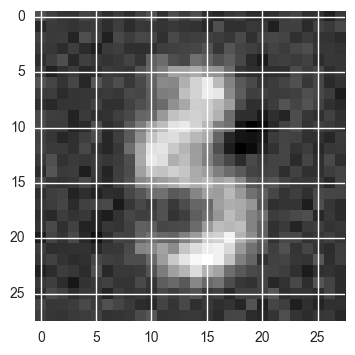

In [56]:
plt.imshow(output[0].reshape((28,28)),cmap="gray",interpolation="nearest")

![Alt Image](graph.png "Compuational Graph")